In [6]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode
import os
os.environ['Tf_CPP_MIN_LOG_LEVEL']='2'


In [7]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [8]:
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

Saved to photo.jpg


In [ ]:
from google.colab.patches import cv2_imshow
frame = cv2.imread("photo.jpg", cv2.IMREAD_UNCHANGED)
cv2_imshow(frame)
face=cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
gray =cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)


NameError: name 'cv2' is not defined

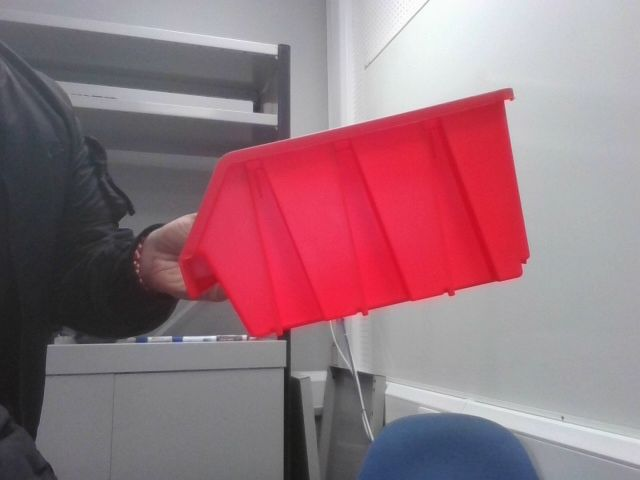

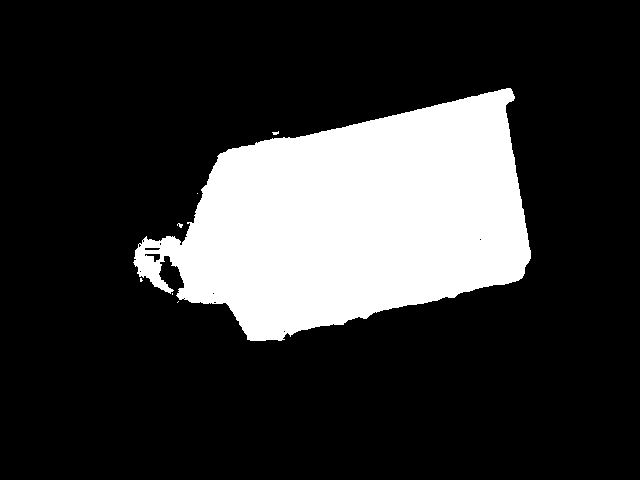

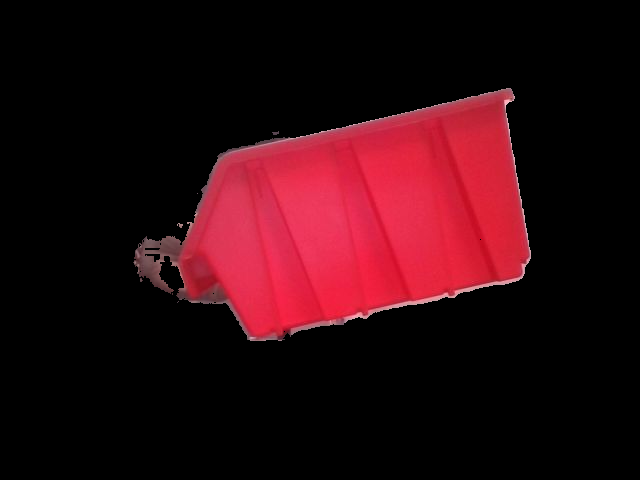

In [18]:
frame = cv2.imread("photo.jpg", cv2.IMREAD_UNCHANGED)

lower = (160,50,80)
upper= (180,240,255)
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
maskb = cv2.inRange(hsv, lower, upper)
#maskg = cv2.inRange(hsv, lower, upper)

#mask = cv2.bitwise_or(maskb, maskg)
com = cv2.bitwise_and(frame,frame, mask=maskb)


cv2_imshow(frame)
cv2_imshow(maskb)
cv2_imshow(com)



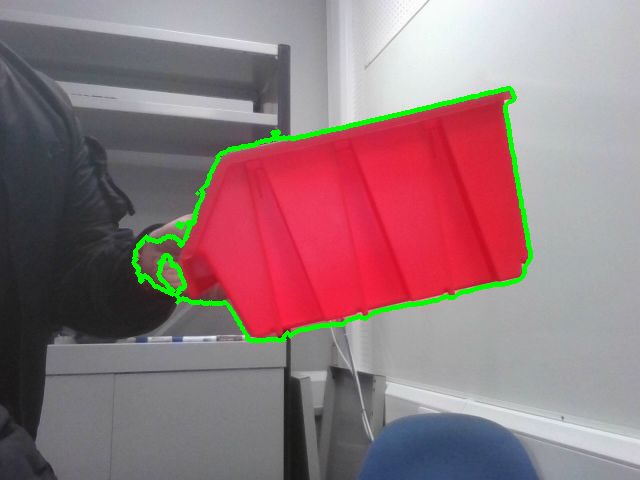

In [20]:
contours, hierarchy = cv2.findContours(maskb,
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

cv2.drawContours(frame, contours, -1, (0, 255, 0), 3)
cv2_imshow(frame)

In [21]:
cx =0
cy=0

for i in contours:
    M = cv2.moments(i)
    if M['m00'] != 0:
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        cv2.drawContours(frame, [i], -1, (0, 255, 0), 2)
        cv2.circle(frame, (cx, cy), 7, (0, 0, 255), -1)
        cv2.putText(frame, "center", (cx - 20, cy - 20),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
    print(f"x: {cx} y: {cy}")

x: 0 y: 0
x: 0 y: 0
x: 140 y: 279
x: 180 y: 225
x: 180 y: 225
x: 275 y: 132
x: 354 y: 219


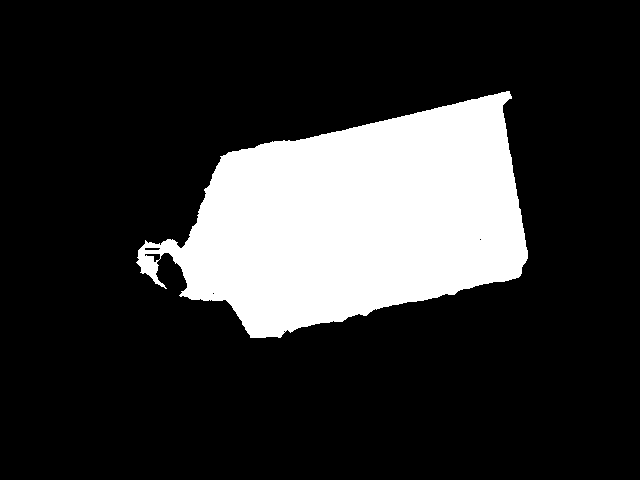

x: 354 y: 219
x: 354 y: 219
x: 140 y: 279
x: 180 y: 225
x: 180 y: 225
x: 275 y: 132
x: 354 y: 219


In [24]:
blur = cv2.GaussianBlur(maskb, (9,9), 0)
contours, hierarchy = cv2.findContours(maskb,
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

cv2.drawContours(maskb, contours, -1, (0, 255, 0), 3)
cv2_imshow(maskb)

for i in contours:
    M = cv2.moments(i)
    if M['m00'] != 0:
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        cv2.drawContours(frame, [i], -1, (0, 255, 0), 2)
        cv2.circle(frame, (cx, cy), 7, (0, 0, 255), -1)
        cv2.putText(frame, "center", (cx - 20, cy - 20),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
    print(f"x: {cx} y: {cy}")
